In [22]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train = pd.read_csv('./drive/MyDrive/LG_Aimer/train.csv')
test = pd.read_csv('./drive/MyDrive/LG_Aimer/test.csv')
meta_x_features= pd.read_csv('./drive/MyDrive/LG_Aimer/meta/x_feature_info.csv')
meta_y_features= pd.read_csv('./drive/MyDrive/LG_Aimer/meta/y_feature_info.csv')
y_feature_spec_info = pd.read_csv('./drive/MyDrive/LG_Aimer/meta/y_feature_spec_info.csv')

from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
import random
import os
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED']=str(seed)
    np.random.seed(seed)
seed_everything(42)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_x = train.filter(regex='X') # Input : X Feature
train_y = train.filter(regex='Y') # Input : y Feature

max = train_x.loc[:,['X_19','X_20','X_21','X_22']].max(axis=1)
min = train_x.loc[:,['X_19','X_20','X_21','X_22']].min(axis=1)
train_x['X_57'] = max-min
max = train_x.loc[:,['X_30','X_31','X_32','X_33']].max(axis=1)
min = train_x.loc[:,['X_30','X_31','X_32','X_33']].min(axis=1)
train_x['X_58'] = max-min

columns = train_x.columns

In [24]:
y_feature_spec_info

,Feature,최소,최대
0,Y_01,0.2,2.0
1,Y_02,0.2,2.1
2,Y_03,0.2,2.1
3,Y_04,7.0,19.0
4,Y_05,22.0,36.5
5,Y_06,-19.2,19.0
6,Y_07,2.4,4.0
7,Y_08,-29.2,-24.0
8,Y_09,-29.2,-24.0
9,Y_10,-30.6,-20.0


---


### 아래 코드 사용방법!
숫자 부분을 잘 바꾼다

Y_01

In [25]:
df1_pass=train_y[(train_y['Y_01']>=0.2)&(train_y['Y_01']<=2.0)]
df1_fail=train_y[(train_y['Y_01']<0.2)|(train_y['Y_01']>2.0)]

x01_train_pass = train_x.loc[df1_pass.index,:]
x01_train_fail = train_x.loc[df1_fail.index,:]

x01_train_pass['X_60']='Pass'
x01_train_fail['X_60']='Fail'

x01_train = pd.concat([x01_train_pass,x01_train_fail],ignore_index=True)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(48,150))
n=1

for column in columns:
  ax = plt.subplot(15,4,n)
  plt.xlabel(column) 
  sns.boxplot(x='X_60',y=column,data=x01_train)
  n+=1
plt.tight_layout()
plt.show()

Y_02

In [42]:
df2_pass=train_y[(train_y['Y_02']>=0.2)&(train_y['Y_02']<=2.1)]
df2_fail=train_y[(train_y['Y_02']<0.2)|(train_y['Y_02']>2.1)]

x02_train_pass = train_x.loc[df2_pass.index,:]
x02_train_fail = train_x.loc[df2_fail.index,:]

x02_train_pass['X_60']='Pass'
x02_train_fail['X_60']='Fail'

x02_train = pd.concat([x02_train_pass,x02_train_fail],ignore_index=True)

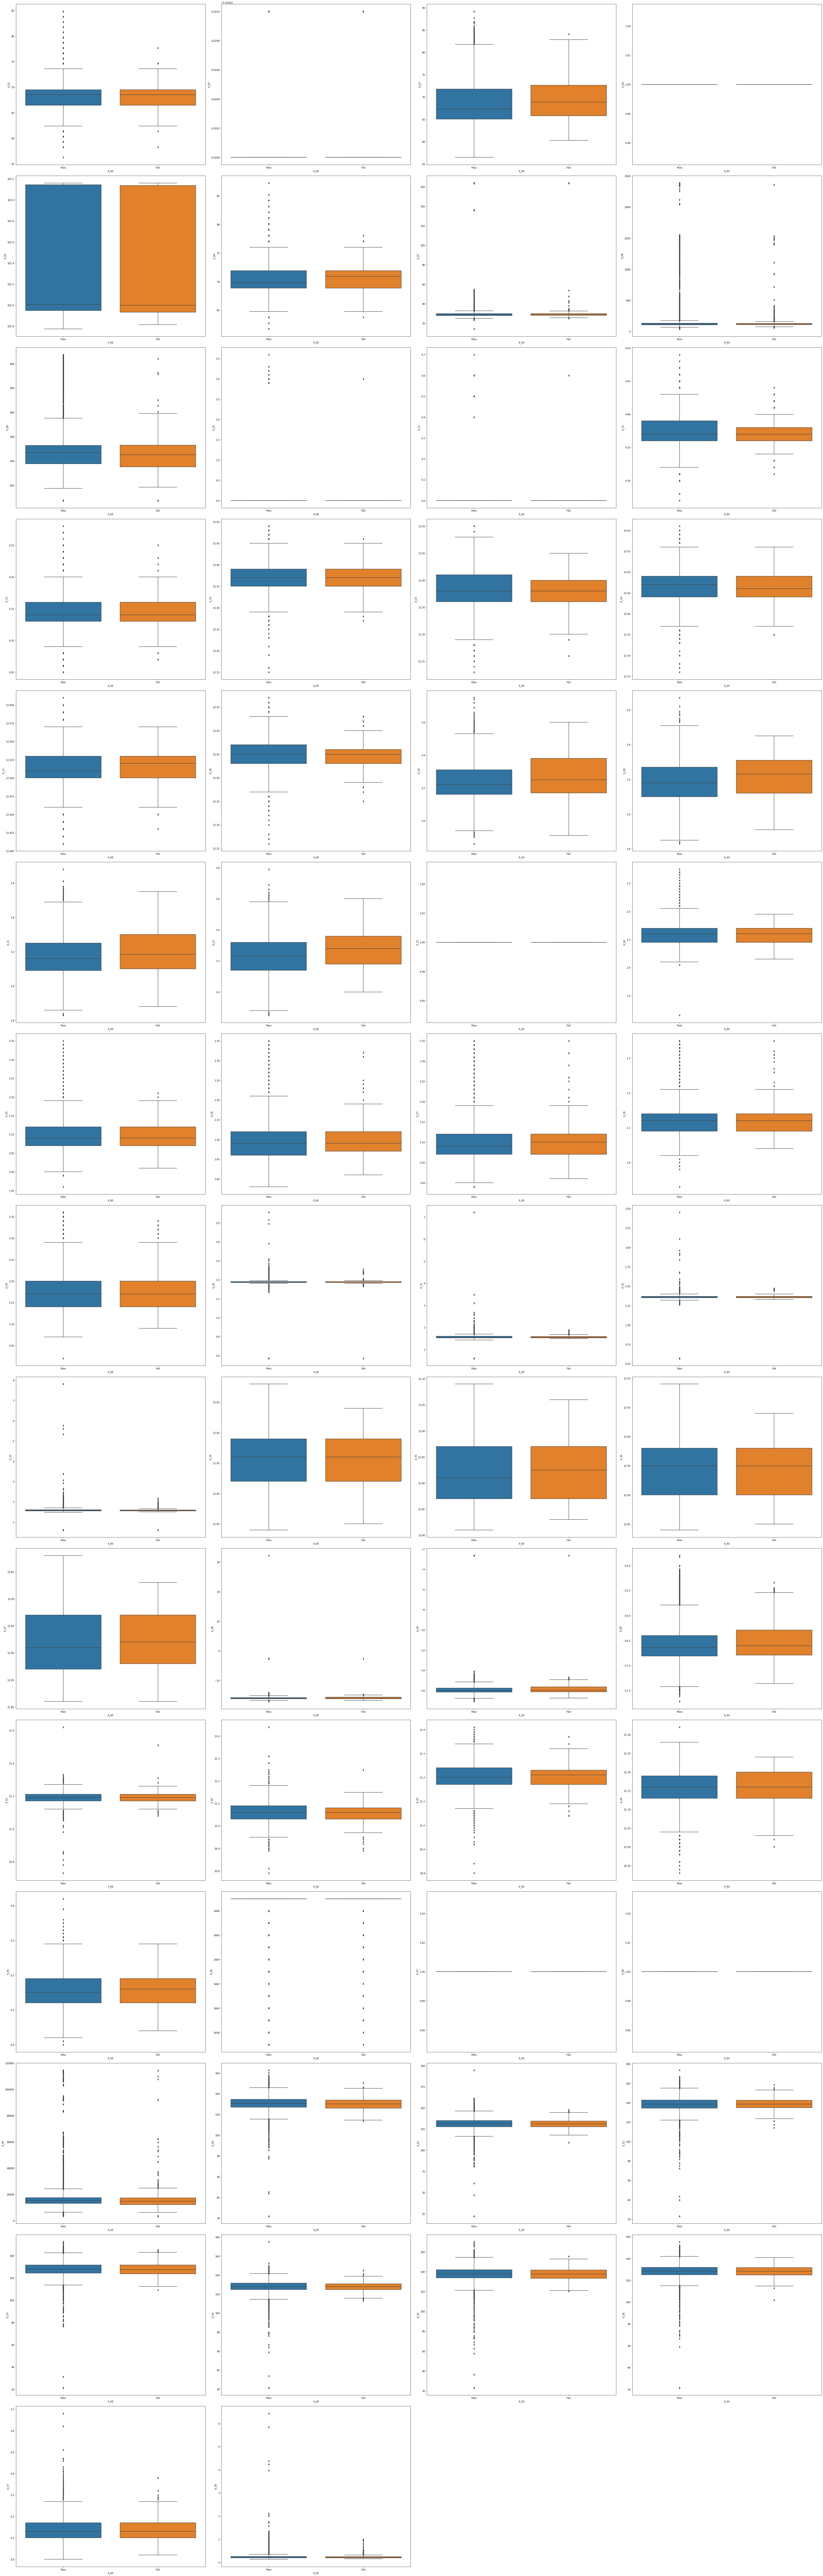

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(48,150))
n=1

for column in columns:
  ax = plt.subplot(15,4,n)
  plt.xlabel(column) 
  sns.boxplot(x='X_60',y=column,data=x02_train)
  n+=1
plt.tight_layout()
plt.show()

Y_08

In [40]:
df8_pass=train_y[(train_y['Y_08']>=-29.2)&(train_y['Y_08']<=-24)]
df8_fail=train_y[(train_y['Y_08']<-29.2)|(train_y['Y_08']>-24)]

x08_train_pass = train_x.loc[df8_pass.index,:]
x08_train_fail = train_x.loc[df8_fail.index,:]

x08_train_pass['X_60']='Pass'
x08_train_fail['X_60']='Fail'

x08_train = pd.concat([x08_train_pass,x08_train_fail],ignore_index=True)

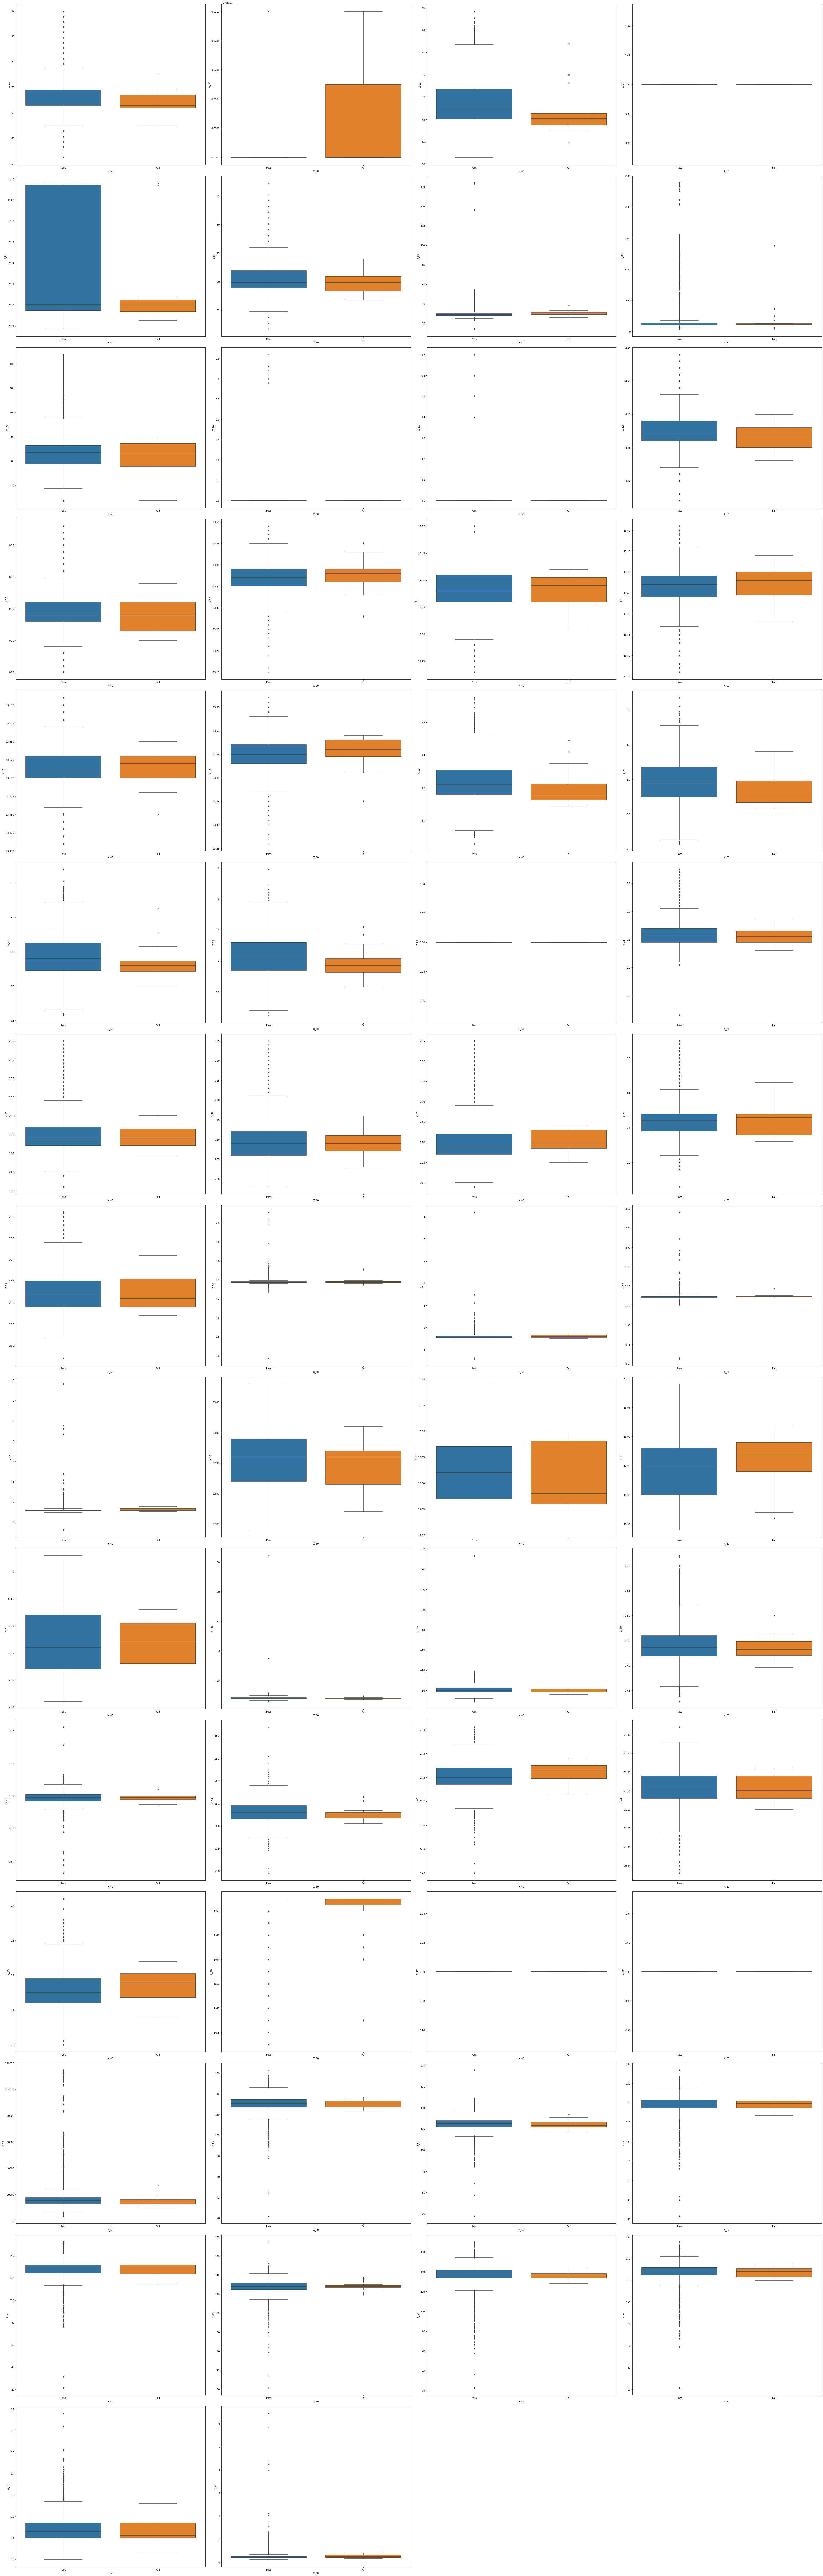

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(48,150))
n=1

for column in columns:
  ax = plt.subplot(15,4,n)
  plt.xlabel(column) 
  sns.boxplot(x='X_60',y=column,data=x08_train)
  n+=1
plt.tight_layout()
plt.show()